In [1]:
import pandas, seaborn, numpy

import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':20})

import pyensembl
annotation = pyensembl.EnsemblRelease(100)

# 1. read data

In [2]:
data_file = '/home/adrian/projects/vigur/results/deseq2_filtered/strict_union_experiment_three.tsv'
df = pandas.read_csv(data_file, sep='\t')
df.set_index('gene_name', drop=True, inplace=True)
df.drop(columns=['zero4', 'zero24'], inplace=True)
df.drop(columns=['half24', 'five24', 'fifty24'], inplace=True)
df = df[df.abs().max(axis=1) >= 0.5]

df.shape

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


(160, 3)

# 2. plot data

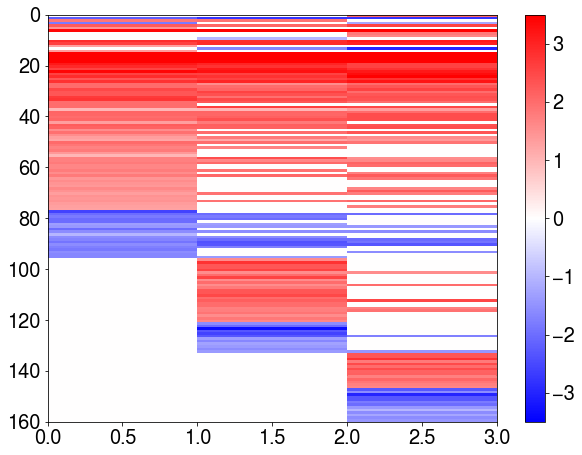

In [3]:
fig = matplotlib.pyplot.figure(figsize=1.4*numpy.array([6.4, 4.8]))
ax = fig.add_subplot(1,1,1)
o = ax.pcolor(df, cmap='bwr', vmin=-3.5, vmax=3.5)

fig.gca().invert_yaxis()

fig.colorbar(o, ax=ax)
fig.tight_layout()

matplotlib.pyplot.savefig('original.svg')

# 3. cluster data using seaborn

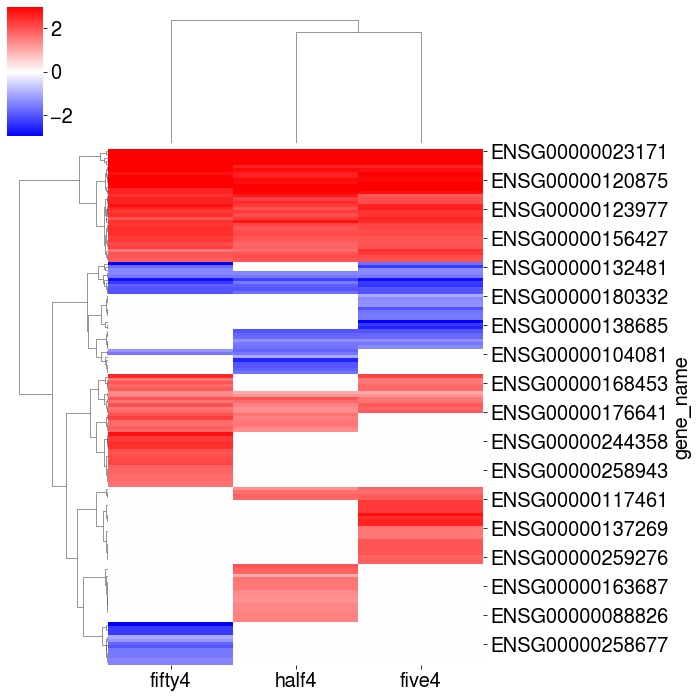

In [4]:
seaborn.clustermap(df, cmap='bwr', vmin=-3, vmax=3, method='ward')

matplotlib.pyplot.savefig('seaborn_clustered.svg')

# 4. qualitative clustering

In [5]:
up = df[df.sum(axis=1) > 0]
print(up.shape)
for ensembl in up.index:
    try:
        name = annotation.gene_name_of_gene_id(ensembl)
    except:
        name = ensembl
        #print('***', ensembl)
    #print('up', up[ensembl], ensembl, name)
    print(ensembl)

(112, 3)
ENSG00000073756
ENSG00000171246
ENSG00000095752
ENSG00000154734
ENSG00000121966
ENSG00000258943
ENSG00000108932
ENSG00000120875
ENSG00000181634
ENSG00000178878
ENSG00000160179
ENSG00000023171
ENSG00000109321
ENSG00000211448
ENSG00000004799
ENSG00000135346
ENSG00000027869
ENSG00000172572
ENSG00000178726
ENSG00000119508
ENSG00000272841
ENSG00000153234
ENSG00000159167
ENSG00000140519
ENSG00000156427
ENSG00000187479
ENSG00000226935
ENSG00000116761
ENSG00000108551
ENSG00000154319
ENSG00000237649
ENSG00000158050
ENSG00000123977
ENSG00000146374
ENSG00000028137
ENSG00000174343
ENSG00000141404
ENSG00000003989
ENSG00000127951
ENSG00000185186
ENSG00000255112
ENSG00000163687
ENSG00000267165
ENSG00000125740
ENSG00000138134
ENSG00000144891
ENSG00000166971
ENSG00000132906
ENSG00000095637
ENSG00000119986
ENSG00000174460
ENSG00000276600
ENSG00000030419
ENSG00000087494
ENSG00000120833
ENSG00000175505
ENSG00000013588
ENSG00000117461
ENSG00000136826
ENSG00000095794
ENSG00000125538
ENSG00000158859

## 4.1. group selection

In [6]:
pos1 = df.loc[(df['half4'] > 0) & (df['five4'] > 0) & (df['fifty4'] > 0)]
pos1['sum'] = pos1.sum(axis=1)
pos1.sort_values(by=['sum'], inplace=True, ascending=False)

gene_names = []
for ensembl in pos1.index:
    try:
        name = annotation.gene_name_of_gene_id(ensembl)
    except:
        name = ensembl
    gene_names.append(name)
pos1['names'] = gene_names

print(pos1.shape)
print(list(pos1['names']))
pos1.head(50)

(42, 5)
['AREG', 'GRAMD1B', 'PDK4', 'DIO2', 'CXCR4', 'THBD', 'AL139393.3', 'STC1', 'DUSP4', 'CGA', 'TNFSF15', 'PDE3A', 'NR4A3', 'SH2D2A', 'NR4A2', 'FAM167A', 'C11orf96', 'DAW1', 'RASD1', 'CTH', 'SLC7A2', 'IL11', 'LINC00161', 'LINC00313', 'CHMP1B', 'CHRNA9', 'GNAL', 'FGF18', 'KIFC1', 'CHMP1B-AS1', 'TNFRSF1B', 'CREM', 'SOCS2', 'AKTIP', 'IKZF2', 'RHCG', 'DOCK8', 'RNF152', 'PTHLH', 'STAMBPL1', 'AGTR1', 'RSPO3']


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,half4,five4,fifty4,sum,names
gene_name,,,,,
ENSG00000109321,5.599913,5.442943,5.523562,16.566418,AREG
ENSG00000023171,4.969626,5.183222,5.000000,15.152848,GRAMD1B
ENSG00000004799,4.285402,4.754888,4.392317,13.432607,PDK4
ENSG00000211448,4.273018,4.662965,3.624491,12.560474,DIO2
ENSG00000121966,3.392317,3.554589,4.129283,11.076189,CXCR4
ENSG00000178726,3.405992,3.263034,3.169925,9.838952,THBD
ENSG00000272841,2.874469,2.807355,3.544321,9.226145,AL139393.3
ENSG00000159167,2.807355,3.000000,3.222392,9.029747,STC1
ENSG00000120875,2.874469,2.874469,3.169925,8.918863,DUSP4


In [7]:
pos2 = df.loc[(df['half4'] > 0) & (df['five4'] > 0) & (df['fifty4'] <= 0)]
pos2['sum'] = pos2.sum(axis=1)
pos2.sort_values(by=['sum'], inplace=True, ascending=False)

gene_names = []
for ensembl in pos2.index:
    try:
        name = annotation.gene_name_of_gene_id(ensembl)
    except:
        name = ensembl
    gene_names.append(name)
pos2['names'] = gene_names

print(pos2.shape)
pos2.head()

(4, 5)


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,half4,five4,fifty4,sum,names
gene_name,,,,,
ENSG00000171246,1.874469,1.938599,0.0,3.813069,NPTX1
ENSG00000117461,1.795180,1.934905,0.0,3.730085,PIK3R3
ENSG00000095637,1.700440,1.700440,0.0,3.400879,SORBS1
ENSG00000127951,1.321928,1.807355,0.0,3.129283,FGL2


In [8]:
pos3 = df.loc[(df['half4'] <= 0) & (df['five4'] > 0) & (df['fifty4'] > 0)]
pos3['sum'] = pos3.sum(axis=1)
pos3.sort_values(by=['sum'], inplace=True, ascending=False)

gene_names = []
for ensembl in pos3.index:
    try:
        name = annotation.gene_name_of_gene_id(ensembl)
    except:
        name = ensembl
    gene_names.append(name)
pos3['names'] = gene_names

print(pos3.shape)
pos3.head()

(5, 5)


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,half4,five4,fifty4,sum,names
gene_name,,,,,
ENSG00000269952,0.0,2.201634,2.536053,4.737687,AL117336.1
ENSG00000140678,0.0,1.765535,1.925999,3.691534,ITGAX
ENSG00000168453,0.0,1.584963,2.000000,3.584963,HR
ENSG00000166257,0.0,1.736966,1.736966,3.473931,SCN3B
ENSG00000198400,0.0,1.584963,1.584963,3.169925,NTRK1


In [9]:
pos4 = df.loc[(df['half4'] > 0) & (df['five4'] <= 0) & (df['fifty4'] > 0)]
pos4['sum'] = pos4.sum(axis=1)
pos4.sort_values(by=['sum'], inplace=True, ascending=False)

gene_names = []
for ensembl in pos4.index:
    try:
        name = annotation.gene_name_of_gene_id(ensembl)
    except:
        name = ensembl
    gene_names.append(name)
pos4['names'] = gene_names

print(pos4.shape)
pos4.head(10)

(6, 5)


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,half4,five4,fifty4,sum,names
gene_name,,,,,
ENSG00000105825,1.494765,0.0,2.268489,3.763254,TFPI2
ENSG00000175505,1.652077,0.0,2.000000,3.652077,CLCF1
ENSG00000125538,1.440573,0.0,1.893085,3.333657,IL1B
ENSG00000119938,1.639824,0.0,1.692676,3.332501,PPP1R3C
ENSG00000136826,1.584963,0.0,1.736966,3.321928,KLF4
ENSG00000051108,1.300509,0.0,1.774440,3.074949,HERPUD1


In [10]:
pos5 = df.loc[(df['half4'] > 0) & (df['five4'] <= 0) & (df['fifty4'] <= 0)]
pos5['sum'] = pos5.sum(axis=1)
pos5.sort_values(by=['sum'], inplace=True, ascending=False)

gene_names = []
for ensembl in pos5.index:
    try:
        name = annotation.gene_name_of_gene_id(ensembl)
    except:
        name = ensembl
    gene_names.append(name)
pos5['names'] = gene_names

print(pos5.shape)
print(list(pos5.index))
pos5.head(20)

(18, 5)
['ENSG00000158050', 'ENSG00000132906', 'ENSG00000119986', 'ENSG00000013588', 'ENSG00000163687', 'ENSG00000125740', 'ENSG00000158859', 'ENSG00000088826', 'ENSG00000154734', 'ENSG00000275993', 'ENSG00000163235', 'ENSG00000174460', 'ENSG00000166292', 'ENSG00000160179', 'ENSG00000123395', 'ENSG00000178878', 'ENSG00000134480', 'ENSG00000276600']


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,half4,five4,fifty4,sum,names
gene_name,,,,,
ENSG00000158050,2.000000,0.0,0.0,2.000000,DUSP2
ENSG00000132906,1.874469,0.0,0.0,1.874469,CASP9
ENSG00000119986,1.807355,0.0,0.0,1.807355,AVPI1
ENSG00000013588,1.652077,0.0,0.0,1.652077,GPRC5A
ENSG00000163687,1.584963,0.0,0.0,1.584963,DNASE1L3
ENSG00000125740,1.584963,0.0,0.0,1.584963,FOSB
ENSG00000158859,1.584963,0.0,0.0,1.584963,ADAMTS4
ENSG00000088826,1.502500,0.0,0.0,1.502500,SMOX
ENSG00000154734,1.479993,0.0,0.0,1.479993,ADAMTS1


In [11]:
pos6 = df.loc[(df['half4'] <= 0) & (df['five4'] > 0) & (df['fifty4'] <= 0)]
pos6['sum'] = pos6.sum(axis=1)
pos6.sort_values(by=['sum'], inplace=True, ascending=False)

gene_names = []
for ensembl in pos6.index:
    try:
        name = annotation.gene_name_of_gene_id(ensembl)
    except:
        name = ensembl
    gene_names.append(name)
pos6['names'] = gene_names

print(list(pos6.index))
print(pos6.shape)
pos6.head(25)

['ENSG00000228294', 'ENSG00000273077', 'ENSG00000259423', 'ENSG00000230024', 'ENSG00000271218', 'ENSG00000252948', 'ENSG00000259109', 'ENSG00000280191', 'ENSG00000153802', 'ENSG00000109193', 'ENSG00000171848', 'ENSG00000163406', 'ENSG00000267279', 'ENSG00000113448', 'ENSG00000173597', 'ENSG00000259276', 'ENSG00000137269', 'ENSG00000138347', 'ENSG00000081985', 'ENSG00000258504']
(20, 5)


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,half4,five4,fifty4,sum,names
gene_name,,,,,
ENSG00000228294,0.0,2.807355,0.0,2.807355,BMS1P17
ENSG00000273077,0.0,2.584963,0.0,2.584963,AC110609.1
ENSG00000259423,0.0,2.584963,0.0,2.584963,AC113146.1
ENSG00000230024,0.0,2.502500,0.0,2.502500,ENSG00000230024
ENSG00000271218,0.0,2.321928,0.0,2.321928,AL033384.2
ENSG00000252948,0.0,2.321928,0.0,2.321928,RNU6-1314P
ENSG00000259109,0.0,2.321928,0.0,2.321928,AC004858.1
ENSG00000280191,0.0,2.321928,0.0,2.321928,LINC01669
ENSG00000153802,0.0,2.000000,0.0,2.000000,TMPRSS11D


In [12]:
pos7 = df.loc[(df['half4'] <= 0) & (df['five4'] <= 0) & (df['fifty4'] > 0)]
pos7['sum'] = pos7.sum(axis=1)
pos7.sort_values(by=['sum'], inplace=True, ascending=False)

gene_names = []
for ensembl in pos7.index:
    try:
        name = annotation.gene_name_of_gene_id(ensembl)
    except:
        name = ensembl
    gene_names.append(name)
pos7['names'] = gene_names

print(pos7.shape)
print(list(pos7.index))
pos7.head(20)

(17, 5)
['ENSG00000228997', 'ENSG00000117479', 'ENSG00000233148', 'ENSG00000281491', 'ENSG00000244358', 'ENSG00000261114', 'ENSG00000230300', 'ENSG00000086991', 'ENSG00000073756', 'ENSG00000164690', 'ENSG00000103978', 'ENSG00000258943', 'ENSG00000243849', 'ENSG00000155850', 'ENSG00000146469', 'ENSG00000101901', 'ENSG00000108932']


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,half4,five4,fifty4,sum,names
gene_name,,,,,
ENSG00000228997,0.0,0.0,2.807355,2.807355,AL136452.1
ENSG00000117479,0.0,0.0,2.485427,2.485427,SLC19A2
ENSG00000233148,0.0,0.0,2.459432,2.459432,SYF2P2
ENSG00000281491,0.0,0.0,2.321928,2.321928,DNAJB5-DT
ENSG00000244358,0.0,0.0,2.321928,2.321928,AC055758.2
ENSG00000261114,0.0,0.0,2.169925,2.169925,AC012181.1
ENSG00000230300,0.0,0.0,2.137504,2.137504,STARD13-IT1
ENSG00000086991,0.0,0.0,2.097099,2.097099,NOX4
ENSG00000073756,0.0,0.0,2.045189,2.045189,PTGS2


In [13]:
neg1 = df.loc[(df['half4'] >= 0) & (df['five4'] >= 0) & (df['fifty4'] < 0)]
neg1['sum'] = neg1.sum(axis=1)
neg1.sort_values(by=['sum'], inplace=True, ascending=False)

gene_names = []
for ensembl in neg1.index:
    try:
        name = annotation.gene_name_of_gene_id(ensembl)
    except:
        name = ensembl
    gene_names.append(name)
neg1['names'] = gene_names

print(neg1.shape)
neg1.head(20)

/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(13, 5)


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,half4,five4,fifty4,sum,names
gene_name,,,,,
ENSG00000115267,0.0,0.0,-1.000000,-1.000000,IFIH1
ENSG00000258565,0.0,0.0,-1.222392,-1.222392,BLZF2P
ENSG00000156463,0.0,0.0,-1.415037,-1.415037,SH3RF2
ENSG00000095383,0.0,0.0,-1.447459,-1.447459,TBC1D2
ENSG00000272104,0.0,0.0,-1.584963,-1.584963,Z84492.2
ENSG00000171435,0.0,0.0,-1.584963,-1.584963,KSR2
ENSG00000275342,0.0,0.0,-1.584963,-1.584963,PRAG1
ENSG00000258677,0.0,0.0,-1.807355,-1.807355,AC022826.2
ENSG00000255319,0.0,0.0,-2.000000,-2.000000,ENPP7P8


In [14]:
neg2 = df.loc[(df['half4'] >= 0) & (df['five4'] < 0) & (df['fifty4'] >= 0)]
neg2['sum'] = neg2.sum(axis=1)
neg2.sort_values(by=['sum'], inplace=True, ascending=False)

gene_names = []
for ensembl in neg2.index:
    try:
        name = annotation.gene_name_of_gene_id(ensembl)
    except:
        name = ensembl
    gene_names.append(name)
neg2['names'] = gene_names

print(neg2.shape)
neg2.head(15)

(11, 5)


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,half4,five4,fifty4,sum,names
gene_name,,,,,
ENSG00000180332,0.0,-1.000000,0.0,-1.000000,KCTD4
ENSG00000100767,0.0,-1.280108,0.0,-1.280108,PAPLN
ENSG00000166592,0.0,-1.321928,0.0,-1.321928,RRAD
ENSG00000117228,0.0,-1.387023,0.0,-1.387023,GBP1
ENSG00000257767,0.0,-1.584963,0.0,-1.584963,AC002996.1
ENSG00000196872,0.0,-1.584963,0.0,-1.584963,KIAA1211L
ENSG00000108691,0.0,-1.663519,0.0,-1.663519,CCL2
ENSG00000259952,0.0,-2.000000,0.0,-2.000000,AC009133.2
ENSG00000138685,0.0,-2.321928,0.0,-2.321928,FGF2


In [15]:
neg3 = df.loc[(df['half4'] < 0) & (df['five4'] >= 0) & (df['fifty4'] >= 0)]
neg3['sum'] = neg3.sum(axis=1)
neg3.sort_values(by=['sum'], inplace=True, ascending=False)

gene_names = []
for ensembl in neg3.index:
    try:
        name = annotation.gene_name_of_gene_id(ensembl)
    except:
        name = ensembl
    gene_names.append(name)
neg3['names'] = gene_names

print(neg3.shape)
neg3.head(10)

/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(6, 5)


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,half4,five4,fifty4,sum,names
gene_name,,,,,
ENSG00000134198,-1.000000,0.0,0.0,-1.000000,TSPAN2
ENSG00000170390,-1.667425,0.0,0.0,-1.667425,DCLK2
ENSG00000165891,-1.839535,0.0,0.0,-1.839535,E2F7
ENSG00000112139,-2.000000,0.0,0.0,-2.000000,MDGA1
ENSG00000198838,-2.000000,0.0,0.0,-2.000000,RYR3
ENSG00000196302,-2.584963,0.0,0.0,-2.584963,AC146944.1


In [16]:
neg4 = df.loc[(df['half4'] < 0) & (df['five4'] >= 0) & (df['fifty4'] < 0)]
neg4['sum'] = neg4.sum(axis=1)
neg4.sort_values(by=['sum'], inplace=True, ascending=False)

gene_names = []
for ensembl in neg4.index:
    try:
        name = annotation.gene_name_of_gene_id(ensembl)
    except:
        name = ensembl
    gene_names.append(name)
neg4['names'] = gene_names

print(neg4.shape)
neg4.head()

/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(2, 5)


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,half4,five4,fifty4,sum,names
gene_name,,,,,
ENSG00000130751,-1.807355,0.0,-1.222392,-3.029747,NPAS1
ENSG00000104081,-1.584963,0.0,-1.584963,-3.169925,BMF


In [17]:
neg5 = df.loc[(df['half4'] >= 0) & (df['five4'] < 0) & (df['fifty4'] < 0)]
neg5['sum'] = neg5.sum(axis=1)
neg5.sort_values(by=['sum'], inplace=True, ascending=False)

gene_names = []
for ensembl in neg5.index:
    try:
        name = annotation.gene_name_of_gene_id(ensembl)
    except:
        name = ensembl
    gene_names.append(name)
neg5['names'] = gene_names

print(neg5.shape)
neg5.head(10)

(3, 5)


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,half4,five4,fifty4,sum,names
gene_name,,,,,
ENSG00000116717,0.0,-1.370112,-1.425607,-2.795718,GADD45A
ENSG00000132481,0.0,-2.321928,-1.736966,-4.058894,TRIM47
ENSG00000149633,0.0,-1.678072,-3.000000,-4.678072,KIAA1755


In [25]:
neg6 = df.loc[(df['half4'] < 0) & (df['five4'] < 0) & (df['fifty4'] >= 0)]
neg6['sum'] = neg6.sum(axis=1)
neg6.sort_values(by=['sum'], inplace=True, ascending=False)

gene_names = []
for ensembl in neg6.index:
    try:
        name = annotation.gene_name_of_gene_id(ensembl)
    except:
        name = ensembl
    gene_names.append(name)
neg6['names'] = gene_names

print(neg6.shape)
print(', '.join(gene_names))
neg6.head(10)

(6, 5)
TLR2, FRMD6, TNIP3, IL1A, ART4, LIF


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,half4,five4,fifty4,sum,names
gene_name,,,,,
ENSG00000137462,-1.321928,-1.321928,0.0,-2.643856,TLR2
ENSG00000139926,-1.649503,-1.379414,0.0,-3.028916,FRMD6
ENSG00000050730,-1.584963,-1.584963,0.0,-3.169925,TNIP3
ENSG00000115008,-1.736966,-1.736966,0.0,-3.473931,IL1A
ENSG00000111339,-1.807355,-1.807355,0.0,-3.614710,ART4
ENSG00000128342,-2.000000,-2.000000,0.0,-4.000000,LIF


In [19]:
neg7 = df.loc[(df['half4'] < 0) & (df['five4'] < 0) & (df['fifty4'] < 0)]
neg7['sum'] = neg7.sum(axis=1)
neg7.sort_values(by=['sum'], inplace=True, ascending=False)

gene_names = []
for ensembl in neg7.index:
    try:
        name = annotation.gene_name_of_gene_id(ensembl)
    except:
        name = ensembl
    gene_names.append(name)
neg7['names'] = gene_names

print(neg7.shape)
for name in gene_names:
    print(name)
neg7.head(10)

/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(7, 5)
IFIT2
TRAF1
IRAK2
FOXS1
SNAI2
TRAC
SELE


/home/adrian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,half4,five4,fifty4,sum,names
gene_name,,,,,
ENSG00000119922,-1.415037,-1.415037,-1.415037,-4.245112,IFIT2
ENSG00000056558,-1.584963,-1.584963,-1.584963,-4.754888,TRAF1
ENSG00000134070,-1.678072,-2.000000,-2.000000,-5.678072,IRAK2
ENSG00000179772,-2.000000,-2.000000,-2.000000,-6.000000,FOXS1
ENSG00000019549,-1.893085,-2.378512,-1.893085,-6.164681,SNAI2
ENSG00000277734,-1.584963,-2.321928,-2.321928,-6.228819,TRAC
ENSG00000007908,-2.222392,-2.807355,-2.807355,-7.837102,SELE


## 4.2. re-order and plot

In [20]:
order_pos = list(pos1.index) + list(pos2.index) + list(pos3.index) + list(pos4.index) + list(pos5.index) + list(pos6.index) + list(pos7.index)
order_neg = list(neg1.index) + list(neg2.index) + list(neg3.index) + list(neg4.index) + list(neg5.index) + list(neg6.index) + list(neg7.index)
order = order_pos + order_neg

ordered = df.loc[order, :]

print(df.min(), df.max())

half4    -2.584963
five4    -3.321928
fifty4   -3.000000
dtype: float64 half4     5.599913
five4     5.442943
fifty4    5.523562
dtype: float64


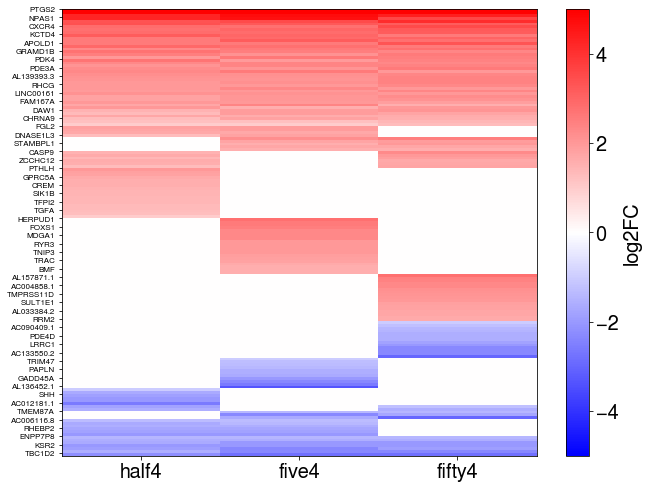

In [21]:
fig = matplotlib.pyplot.figure(figsize=1.5*numpy.array([6.4, 4.8]))
ax = fig.add_subplot(1,1,1)

heatmap = ax.pcolor(ordered, cmap='bwr', vmin=-5, vmax=5)

# invert y-axis
fig.gca().invert_yaxis()

# scale bar
cbar = fig.colorbar(heatmap, ax=ax)
cbar.set_label('log2FC', rotation=90)

# shift the x major ticks at the middle of each cell
ax.set_xticks(numpy.arange(ordered.shape[1]) + 0.5)

# define x labels
ax.set_xticklabels(df.columns)

# define y labels
gene_names = []
for ensembl in list(df.index):
    try:
        gene_name = annotation.gene_name_of_gene_id(ensembl)
    except:
        gene_name = ensembl
    gene_names.append(gene_name)
    
selected_positions = numpy.arange(0,len(gene_names), 3)
selected_labels = [gene_names[i] for i in selected_positions]

ax.set_yticks(selected_positions)
ax.set_yticklabels(selected_labels, fontsize=8)

# tight layout
fig.tight_layout()

# save
fig.savefig('heatmap.svg')

# 4.3 make the group bar

In [22]:
groups = {}

group_data = []
positive_sizes = [len(pos1.index), len(pos2.index), len(pos3.index), len(pos4.index), len(pos5.index), len(pos6.index), len(pos7.index)]
negative_sizes = [len(neg1.index), len(neg2.index), len(neg3.index), len(neg4.index), len(neg5.index), len(neg6.index), len(neg7.index)]
sizes = positive_sizes + negative_sizes
for i in range(len(sizes)):
    for j in range(sizes[i]):
        group_data.append(i+1)
print(group_data, len(group_data))

groups['types'] = group_data
gp = pandas.DataFrame(groups)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14] 160


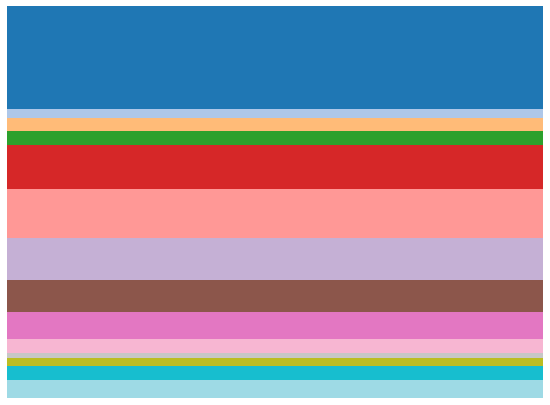

In [23]:
fig = matplotlib.pyplot.figure(figsize=1.5*numpy.array([6.4, 4.8]))
ax = fig.add_subplot(1,1,1)
heatmap = ax.pcolor(gp, cmap='tab20')

# invert y-axis
fig.gca().invert_yaxis()

matplotlib.pyplot.axis('off')
matplotlib.pyplot.savefig('bar.svg')